In [1]:
import pandas as pd
import numpy as np

In [70]:
merged_jokes = pd.read_csv('merged_jokes.csv')

In [71]:
merged_jokes

,Unnamed: 0,title,ups_ratio,selftext,num_comments,nsfw,hot,top
0,0,What do you call a polar bear in the jungle?,0.98,Lost,71,False,1,0
1,1,What do you call two similar boobs?,0.90,Identities,12,True,1,0
2,2,Instead of a swear jar I have a negativity jar...,0.98,It's half empty.,142,False,1,0
3,3,Why does a mermaid wear seashells?,0.97,Because she outgrew her b-shells.,11,False,1,0
4,4,I got an vinyl album of wasp sounds the other ...,0.96,Then I realised I was playing the bee side.,8,False,1,0
...,...,...,...,...,...,...,...,...
1744,895,I'm a member of the American Medical Associati...,0.93,NaN,112,False,0,1
1745,896,Women are like grenades...,0.94,Remove the ring and your house is gone.,197,False,0,1
1746,897,My wife saw an ant picking up a leaf 5 times i...,0.96,"So I picked up the leaf and said, “Yes.”",71,False,0,1
1747,898,Who ever invented Knock-Knock jokes should get...,0.94,NaN,133,False,0,1


In [72]:
merged_jokes.head()

,Unnamed: 0,title,ups_ratio,selftext,num_comments,nsfw,hot,top
0,0,What do you call a polar bear in the jungle?,0.98,Lost,71,False,1,0
1,1,What do you call two similar boobs?,0.90,Identities,12,True,1,0
2,2,Instead of a swear jar I have a negativity jar...,0.98,It's half empty.,142,False,1,0
3,3,Why does a mermaid wear seashells?,0.97,Because she outgrew her b-shells.,11,False,1,0
4,4,I got an vinyl album of wasp sounds the other ...,0.96,Then I realised I was playing the bee side.,8,False,1,0


In [73]:
merged_jokes.drop(['Unnamed: 0'], axis=1, inplace=True)

In [74]:
# Combines title and selftext into one column
merged_jokes['all_text'] = merged_jokes['title'] + ' ' + merged_jokes['selftext']

In [75]:
merged_jokes['all_text'] = merged_jokes['all_text'].astype('str')
merged_jokes['all_text']

0       What do you call a polar bear in the jungle? Lost
1          What do you call two similar boobs? Identities
2       Instead of a swear jar I have a negativity jar...
3       Why does a mermaid wear seashells? Because she...
4       I got an vinyl album of wasp sounds the other ...
                              ...                        
1744                                                  nan
1745    Women are like grenades... Remove the ring and...
1746    My wife saw an ant picking up a leaf 5 times i...
1747                                                  nan
1748    Mahatma Gandhi, as you know, walked barefoot m...
Name: all_text, Length: 1749, dtype: object

In [76]:
# Removes punctuations
merged_jokes['all_text'] = merged_jokes['all_text'].str.replace('[^\w\s]','').str.replace('\d+','')

In [77]:
merged_jokes.head()

,title,ups_ratio,selftext,num_comments,nsfw,hot,top,all_text
0,What do you call a polar bear in the jungle?,0.98,Lost,71,False,1,0,What do you call a polar bear in the jungle Lost
1,What do you call two similar boobs?,0.90,Identities,12,True,1,0,What do you call two similar boobs Identities
2,Instead of a swear jar I have a negativity jar...,0.98,It's half empty.,142,False,1,0,Instead of a swear jar I have a negativity jar...
3,Why does a mermaid wear seashells?,0.97,Because she outgrew her b-shells.,11,False,1,0,Why does a mermaid wear seashells Because she ...
4,I got an vinyl album of wasp sounds the other ...,0.96,Then I realised I was playing the bee side.,8,False,1,0,I got an vinyl album of wasp sounds the other ...


In [78]:
# Removing stop words
import nltk
from nltk.tokenize import word_tokenize  
from nltk.corpus import stopwords

stop = stopwords.words('english')
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [79]:
# Deletes the stop words

merged_jokes['text_no_stopwords'] = merged_jokes['all_text'].apply(lambda x: ' '.join([item for item in x.lower().split() if item not in stop]))

In [80]:
merged_jokes['text_no_stopwords']

0                             call polar bear jungle lost
1                       call two similar boobs identities
2       instead swear jar negativity jar everytime pes...
3                  mermaid wear seashells outgrew bshells
4       got vinyl album wasp sounds day played didnt s...
                              ...                        
1744                                                  nan
1745           women like grenades remove ring house gone
1746    wife saw ant picking leaf times body weight to...
1747                                                  nan
1748    mahatma gandhi know walked barefoot time produ...
Name: text_no_stopwords, Length: 1749, dtype: object

In [81]:
whole_file = ' '.join(merged_jokes['text_no_stopwords'])
whole_file

'call polar bear jungle lost call two similar boobs identities instead swear jar negativity jar everytime pessimistic thought put dollar half empty mermaid wear seashells outgrew bshells got vinyl album wasp sounds day played didnt sound anything like wasps realised playing bee side two fishes tank said drive thing call alligator vest investigator grape say elephant sat nothing let little wine cant believe forgot go gym today thats six years row got kicked zoo feeding ducks crocodiles nsfw glass coffins may popular future remains seen houdini used trap door every show stage going astronaut making coffee onboard iss turns crewmate says damn cant find milk coffee crewmate replies space one use cream whats forrest gumps facebook password forrest whats difference taxes texas taxes keep electrical grid operational recently bought daughter locket picture inside th birthday glad shes finally independent general keep armies sleevies received letter address today intended mister e bones drive b

## Most common words (all jokes)

In [82]:
# Combines all columns
nltk.download('punkt')
allWords = nltk.tokenize.word_tokenize(whole_file)

[nltk_data] Downloading package punkt to C:\Users\Edward
[nltk_data]     Apostol\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [83]:
from nltk import FreqDist
fdist = FreqDist(allWords)
fdist.most_common()

[('said', 212),
 ('im', 168),
 ('wife', 151),
 ('dad', 147),
 ('one', 135),
 ('get', 132),
 ('like', 114),
 ('asked', 109),
 ('dont', 109),
 ('got', 102),
 ('know', 100),
 ('call', 93),
 ('say', 89),
 ('people', 87),
 ('straw', 86),
 ('joke', 82),
 ('edit', 81),
 ('whats', 77),
 ('cant', 74),
 ('told', 74),
 ('man', 73),
 ('son', 72),
 ('today', 71),
 ('says', 71),
 ('time', 70),
 ('ive', 64),
 ('nan', 64),
 ('day', 63),
 ('daughter', 61),
 ('really', 61),
 ('first', 61),
 ('would', 57),
 ('jokes', 57),
 ('two', 56),
 ('never', 56),
 ('old', 56),
 ('thats', 55),
 ('think', 53),
 ('thanks', 53),
 ('year', 52),
 ('much', 51),
 ('going', 50),
 ('could', 50),
 ('tell', 49),
 ('well', 49),
 ('friend', 49),
 ('always', 46),
 ('didnt', 45),
 ('go', 45),
 ('hes', 45),
 ('want', 44),
 ('new', 44),
 ('back', 44),
 ('good', 43),
 ('see', 42),
 ('went', 42),
 ('thought', 40),
 ('called', 40),
 ('hear', 40),
 ('make', 39),
 ('replied', 38),
 ('doctor', 37),
 ('last', 36),
 ('water', 36),
 ('someone

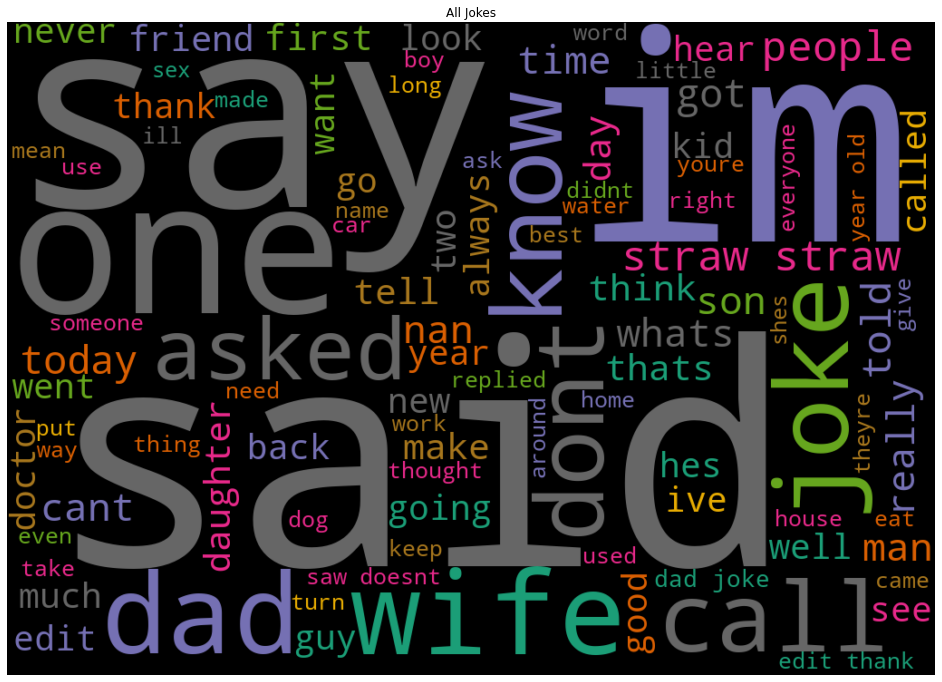

In [84]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import random

from PIL import Image
import numpy as np

wordcloud = WordCloud(colormap='Dark2', max_words=100, width=1024, height=720)
wordcloud.generate(whole_file)
plt.figure(figsize=(20,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("All Jokes")
plt.axis("off")
plt.show()

## Most common words (hot jokes)

In [85]:
hot_text = ' '.join(merged_jokes[merged_jokes['hot']==1]['text_no_stopwords'])
hot_text

'call polar bear jungle lost call two similar boobs identities instead swear jar negativity jar everytime pessimistic thought put dollar half empty mermaid wear seashells outgrew bshells got vinyl album wasp sounds day played didnt sound anything like wasps realised playing bee side two fishes tank said drive thing call alligator vest investigator grape say elephant sat nothing let little wine cant believe forgot go gym today thats six years row got kicked zoo feeding ducks crocodiles nsfw glass coffins may popular future remains seen houdini used trap door every show stage going astronaut making coffee onboard iss turns crewmate says damn cant find milk coffee crewmate replies space one use cream whats forrest gumps facebook password forrest whats difference taxes texas taxes keep electrical grid operational recently bought daughter locket picture inside th birthday glad shes finally independent general keep armies sleevies received letter address today intended mister e bones drive b

In [86]:
allWords = nltk.tokenize.word_tokenize(hot_text)

In [87]:
fdist = FreqDist(allWords)
fdist.most_common()

[('said', 67),
 ('call', 61),
 ('like', 55),
 ('got', 52),
 ('say', 51),
 ('im', 51),
 ('one', 50),
 ('get', 50),
 ('whats', 46),
 ('straw', 44),
 ('dont', 42),
 ('know', 39),
 ('dad', 36),
 ('wife', 35),
 ('cant', 33),
 ('man', 33),
 ('joke', 30),
 ('hear', 30),
 ('day', 28),
 ('asked', 28),
 ('people', 28),
 ('hes', 26),
 ('today', 25),
 ('called', 23),
 ('really', 23),
 ('went', 22),
 ('didnt', 21),
 ('new', 21),
 ('going', 20),
 ('work', 20),
 ('ive', 20),
 ('could', 20),
 ('good', 20),
 ('thats', 19),
 ('always', 19),
 ('back', 19),
 ('son', 19),
 ('two', 18),
 ('well', 18),
 ('told', 18),
 ('someone', 18),
 ('would', 18),
 ('go', 17),
 ('think', 17),
 ('last', 17),
 ('friend', 17),
 ('put', 16),
 ('much', 16),
 ('never', 16),
 ('make', 16),
 ('old', 16),
 ('night', 16),
 ('says', 15),
 ('tell', 15),
 ('favorite', 15),
 ('see', 15),
 ('want', 15),
 ('name', 15),
 ('best', 15),
 ('right', 14),
 ('ill', 14),
 ('dog', 14),
 ('nothing', 13),
 ('years', 13),
 ('used', 13),
 ('ice', 13)

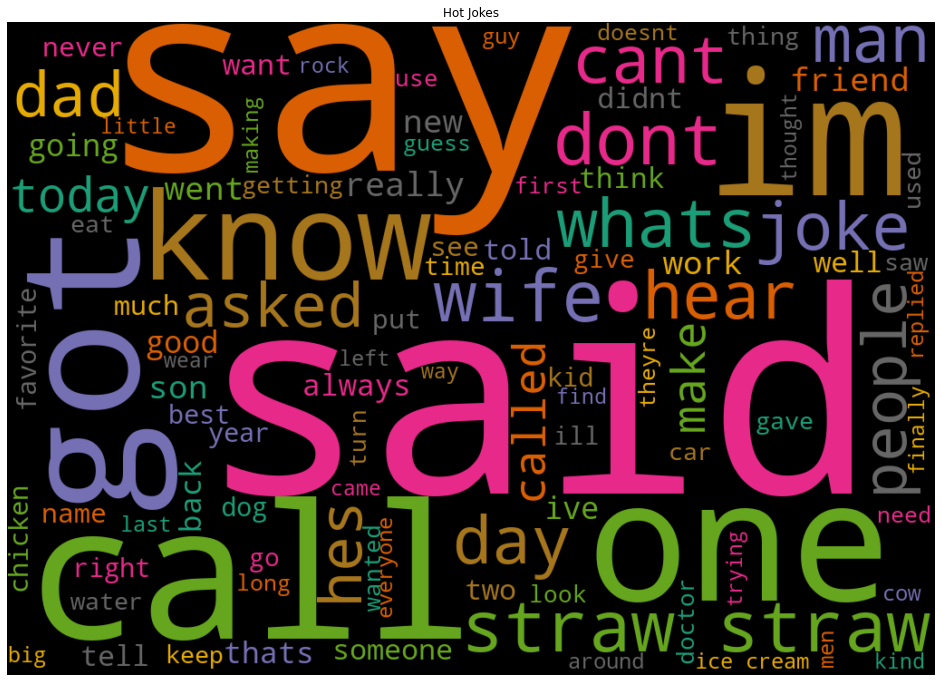

In [88]:
wordcloud = WordCloud(colormap='Dark2', max_words=100, width=1024, height=720)
wordcloud.generate(hot_text)
plt.figure(figsize=(20,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Hot Jokes")
plt.axis("off")
plt.show()

## Most common words (top jokes)


In [89]:
top_text = ' '.join(merged_jokes[merged_jokes['top']==1]['text_no_stopwords'])
top_text

'breaking iran struck submarine underwater torpedo persian gulf killing aboard whoops wrong sub nan people keep saying today pi day march th always cake day e wow blew number time dad jokes thanks metal cant wait make rain redditors wife completed week body building program morning girl weighs lbs oz sub still active hasnt posts year wife gave birth today thanking doctor pulled aside sheepishly asked soon think well able sex winked said im duty ten minutes meet car park warning day turned daughter walked said happy started timing watch long silence said second birthday proud handed dad th birthday card looked tears eyes said know one would enough nan genre national anthems country nan reading history french revolution found happened louis xvi head removed girl came bookstore asked chances book curing eating disorders religion slim nun incidentally true story got yelled nan honor former president donald j trump removed daughters boyfriend introduced said hi sir im david nice meet put ha

In [90]:
allWords = nltk.tokenize.word_tokenize(top_text)

In [91]:
fdist = FreqDist(allWords)
fdist.most_common()

[('said', 145),
 ('im', 117),
 ('wife', 116),
 ('dad', 111),
 ('one', 85),
 ('get', 82),
 ('asked', 81),
 ('edit', 76),
 ('dont', 67),
 ('nan', 61),
 ('know', 61),
 ('people', 59),
 ('like', 59),
 ('time', 57),
 ('says', 56),
 ('told', 56),
 ('daughter', 53),
 ('son', 53),
 ('thanks', 52),
 ('joke', 52),
 ('got', 50),
 ('first', 50),
 ('today', 46),
 ('jokes', 45),
 ('ive', 44),
 ('year', 43),
 ('straw', 42),
 ('cant', 41),
 ('man', 40),
 ('old', 40),
 ('never', 40),
 ('would', 39),
 ('really', 38),
 ('say', 38),
 ('two', 38),
 ('think', 36),
 ('thats', 36),
 ('day', 35),
 ('much', 35),
 ('tell', 34),
 ('friend', 32),
 ('call', 32),
 ('well', 31),
 ('whats', 31),
 ('thought', 31),
 ('could', 30),
 ('going', 30),
 ('want', 29),
 ('go', 28),
 ('replied', 28),
 ('always', 27),
 ('doctor', 27),
 ('see', 27),
 ('made', 27),
 ('thank', 27),
 ('came', 26),
 ('youre', 26),
 ('every', 26),
 ('water', 26),
 ('back', 25),
 ('home', 24),
 ('didnt', 24),
 ('make', 23),
 ('new', 23),
 ('gold', 23),


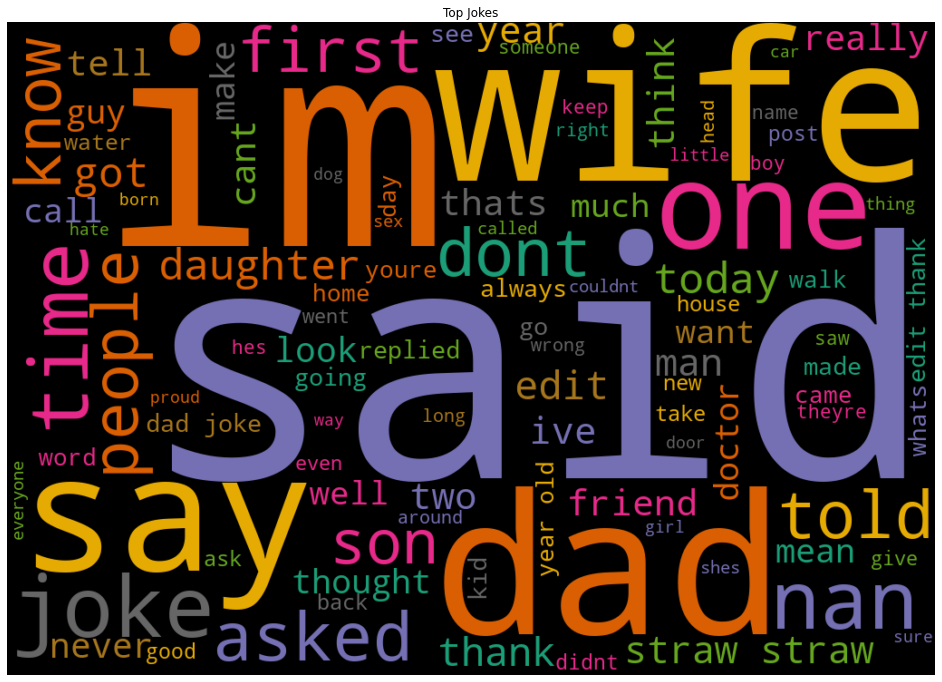

In [92]:
wordcloud = WordCloud(colormap='Dark2', max_words=100, width=1024, height=720)
wordcloud.generate(top_text)
plt.figure(figsize=(20,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Top Jokes")
plt.axis("off")
plt.show()

In [93]:
merged_jokes

,title,ups_ratio,selftext,num_comments,nsfw,hot,top,all_text,text_no_stopwords
0,What do you call a polar bear in the jungle?,0.98,Lost,71,False,1,0,What do you call a polar bear in the jungle Lost,call polar bear jungle lost
1,What do you call two similar boobs?,0.90,Identities,12,True,1,0,What do you call two similar boobs Identities,call two similar boobs identities
2,Instead of a swear jar I have a negativity jar...,0.98,It's half empty.,142,False,1,0,Instead of a swear jar I have a negativity jar...,instead swear jar negativity jar everytime pes...
3,Why does a mermaid wear seashells?,0.97,Because she outgrew her b-shells.,11,False,1,0,Why does a mermaid wear seashells Because she ...,mermaid wear seashells outgrew bshells
4,I got an vinyl album of wasp sounds the other ...,0.96,Then I realised I was playing the bee side.,8,False,1,0,I got an vinyl album of wasp sounds the other ...,got vinyl album wasp sounds day played didnt s...
...,...,...,...,...,...,...,...,...,...
1744,I'm a member of the American Medical Associati...,0.93,NaN,112,False,0,1,nan,nan
1745,Women are like grenades...,0.94,Remove the ring and your house is gone.,197,False,0,1,Women are like grenades Remove the ring and yo...,women like grenades remove ring house gone
1746,My wife saw an ant picking up a leaf 5 times i...,0.96,"So I picked up the leaf and said, “Yes.”",71,False,0,1,My wife saw an ant picking up a leaf times it...,wife saw ant picking leaf times body weight to...
1747,Who ever invented Knock-Knock jokes should get...,0.94,NaN,133,False,0,1,nan,nan


# 2-grams

In [117]:
from nltk import ngrams
from collections import Counter

n = 2
ctr = Counter(ngrams(whole_file.split(), n))
ctr.most_common()

[(('straw', 'straw'), 80),
 (('year', 'old'), 30),
 (('dad', 'joke'), 21),
 (('dad', 'jokes'), 19),
 (('edit', 'thanks'), 19),
 (('dont', 'know'), 17),
 (('wife', 'said'), 14),
 (('last', 'night'), 14),
 (('whats', 'difference'), 13),
 (('son', 'asked'), 13),
 (('every', 'time'), 12),
 (('wife', 'asked'), 12),
 (('ive', 'got'), 10),
 (('ice', 'cream'), 10),
 (('feel', 'like'), 9),
 (('old', 'daughter'), 9),
 (('edit', 'thank'), 9),
 (('walks', 'bar'), 9),
 (('thanks', 'gold'), 9),
 (('pause', 'tap'), 9),
 (('ive', 'never'), 8),
 (('edit', 'wow'), 8),
 (('cant', 'believe'), 7),
 (('im', 'going'), 7),
 (('first', 'time'), 7),
 (('man', 'walks'), 7),
 (('said', 'yes'), 7),
 (('gold', 'kind'), 7),
 (('kind', 'stranger'), 7),
 (('sorry', 'sorry'), 6),
 (('said', 'know'), 6),
 (('dont', 'worry'), 6),
 (('didnt', 'want'), 6),
 (('says', 'im'), 6),
 (('im', 'really'), 6),
 (('say', 'im'), 6),
 (('one', 'day'), 6),
 (('every', 'day'), 6),
 (('sounds', 'like'), 6),
 (('told', 'wife'), 6),
 (('ca

# 3-grams

In [122]:
n = 3
ctr = Counter(ngrams(whole_file.split(), n))
ctr.most_common()

[(('straw', 'straw', 'straw'), 78),
 (('gold', 'kind', 'stranger'), 7),
 (('year', 'old', 'daughter'), 6),
 (('tap', 'pause', 'tap'), 6),
 (('sorry', 'sorry', 'sorry'), 5),
 (('chocolate', 'ice', 'cream'), 5),
 (('guess', 'could', 'say'), 5),
 (('sub', 'still', 'active'), 5),
 (('thanks', 'gold', 'kind'), 5),
 (('plant', 'flowers', 'havent'), 4),
 (('flowers', 'havent', 'botany'), 4),
 (('side', 'theres', 'nothing'), 4),
 (('ice', 'cream', 'said'), 4),
 (('way', 'start', 'conversation'), 4),
 (('year', 'old', 'son'), 4),
 (('least', 'spoken', 'language'), 4),
 (('spoken', 'language', 'world'), 4),
 (('language', 'world', 'sign'), 4),
 (('world', 'sign', 'language'), 4),
 (('pause', 'tap', 'pause'), 4),
 (('edit', 'thanks', 'gold'), 4),
 (('whim', 'away', 'whim'), 4),
 (('away', 'whim', 'away'), 4),
 (('got', 'vinyl', 'album'), 3),
 (('played', 'didnt', 'sound'), 3),
 (('didnt', 'sound', 'anything'), 3),
 (('sound', 'anything', 'like'), 3),
 (('anything', 'like', 'wasps'), 3),
 (('playi

In [123]:
n = 4
ctr = Counter(ngrams(whole_file.split(), n))
ctr.most_common()

[(('straw', 'straw', 'straw', 'straw'), 76),
 (('thanks', 'gold', 'kind', 'stranger'), 5),
 (('plant', 'flowers', 'havent', 'botany'), 4),
 (('sorry', 'sorry', 'sorry', 'sorry'), 4),
 (('least', 'spoken', 'language', 'world'), 4),
 (('spoken', 'language', 'world', 'sign'), 4),
 (('language', 'world', 'sign', 'language'), 4),
 (('pause', 'tap', 'pause', 'tap'), 4),
 (('whim', 'away', 'whim', 'away'), 4),
 (('played', 'didnt', 'sound', 'anything'), 3),
 (('didnt', 'sound', 'anything', 'like'), 3),
 (('sound', 'anything', 'like', 'wasps'), 3),
 (('whats', 'difference', 'taxes', 'texas'), 3),
 (('cant', 'plant', 'flowers', 'havent'), 3),
 (('whats', 'orange', 'sounds', 'like'), 3),
 (('orange', 'sounds', 'like', 'parrot'), 3),
 (('sounds', 'like', 'parrot', 'carrot'), 3),
 (('pen', 'write', 'underwater', 'write'), 3),
 (('write', 'underwater', 'write', 'words'), 3),
 (('czech', 'one', 'czech', 'one'), 3),
 (('put', 'car', 'reverse', 'thought'), 3),
 (('car', 'reverse', 'thought', 'takes'),